In [1]:
import random
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import itertools
import numpy as np
from tqdm.notebook import tqdm
from collections import defaultdict
import json

In [2]:
main_stats = {
    'flower': ['HP'],
    'plume': ['ATK'],
    'sands': ['HP%', 'ATK%', 'DEF%', 'Energy Recharge%', 'Elemental Mastery'],
    'goblet': ['HP%', 'ATK%', 'DEF%', 'Elemental Mastery', 'Physical DMG%', 'Pyro DMG%', 'Electro DMG%', 'Cryo DMG%', 'Hydro DMG%', 'Dendro DMG%', 'Anemo DMG%', 'Geo DMG%'],
    'circlet': ['HP%', 'ATK%', 'DEF%', 'Elemental Mastery', 'CRIT Rate%', 'CRIT DMG%', 'Healing Bonus%'],
}

main_stat_values = {
    'HP': [4780],
    'ATK': [311],
    'HP%': [46.6],
    'ATK%': [46.6],
    'DEF%': [58.3],
    'Elemental Mastery': [186.5],
    'Energy Recharge%': [51.8],
    'CRIT Rate%': [31.1],
    'CRIT DMG%': [62.2],
    'Healing Bonus%': [35.9],
    'Pyro DMG%': [46.6],
    'Electro DMG%': [46.6],
    'Cryo DMG%': [46.6],
    'Hydro DMG%': [46.6],
    'Dendro DMG%': [46.6],
    'Anemo DMG%': [46.6],
    'Geo DMG%': [46.6],
    'Physical DMG%': [58.3]
}

main_stat_probabilities = {
    'flower': {
        'HP': 1
    },
    'plume': {
        'ATK': 1
    },
    'sands': {
        'HP%': 0.2668,
        'ATK%': 0.2666,
        'DEF%': 0.2666,
        'Energy Recharge%': 0.1,
        'Elemental Mastery': 0.1
    },
    'goblet': {
        'HP%': 0.1925,
        'ATK%': 0.1925,
        'DEF%': 0.19,
        'Elemental Mastery': 0.025,
        'Physical DMG%': 0.05,
        'Pyro DMG%': 0.05,
        'Electro DMG%': 0.05,
        'Cryo DMG%': 0.05,
        'Hydro DMG%':   0.05,
        'Dendro DMG%': 0.05,
        'Anemo DMG%':   0.05,
        'Geo DMG%': 0.05
    },
    'circlet': {
        'HP%': 0.22,
        'ATK%': 0.22,
        'DEF%': 0.22,
        'CRIT Rate%': 0.1,
        'CRIT DMG%': 0.1,
        'Healing Bonus%': 0.1,
        'Elemental Mastery': 0.04
    }
}

sub_stats_values = {
    'ATK%': [4.08, 4.66, 5.25, 5.83],
    'HP%': [4.08, 4.66, 5.25, 5.83],
    'DEF%': [5.10, 5.83, 6.56, 7.29],
    'ATK': [13.62, 15.56, 17.51, 19.45],
    'HP': [209.13, 239.00, 268.88, 298.75],
    'DEF': [16.20, 18.52, 20.83, 23.15],
    'CRIT Rate%': [2.72, 3.11, 3.50, 3.89],
    'CRIT DMG%': [5.44, 6.22, 6.99, 7.77],
    'Elemental Mastery': [16.32, 18.65, 20.98, 23.31],
    'Energy Recharge%': [4.53, 5.18, 5.83, 6.48]
}

sub_stats_weight = {
    'ATK%': 4,
    'HP%': 4,
    'DEF%': 4,
    'ATK': 6,
    'HP': 6,
    'DEF': 6,
    'CRIT Rate%': 3,
    'CRIT DMG%': 3,
    'Elemental Mastery': 4,
    'Energy Recharge%': 4,
}

In [3]:
def generate_artifact(artifact_type=None):
    if artifact_type is None:
        artifact_type = random.choice(list(main_stats.keys()))

    artifact = defaultdict(defaultdict)
    artifact['artifact_type'] = artifact_type
    available_main_stats, available_main_stats_probabilities = map(list, zip(*[(t, p) for t, p in main_stat_probabilities[artifact_type].items()]))

    chosen_main_stat = random.choices(available_main_stats, weights=available_main_stats_probabilities)[0]
    artifact['main_stat'] = chosen_main_stat
    artifact['main_stat_value'] = main_stat_values[chosen_main_stat][0]


    artifact['sub_stats'] = defaultdict(float)
    artifact['sub_stats_number'] = 9 if random.randint(1, 4) == 1 else 8

    available_sub_stats = set(s for s in sub_stats_weight);
    available_sub_stats = available_sub_stats.difference({chosen_main_stat})

    for i in range(artifact['sub_stats_number']):
        if (len(artifact['sub_stats'].items()) < 4):
          tmp = list(available_sub_stats)
          new_sub_stat = random.choices(tmp, weights=[sub_stats_weight[s] for s in tmp] )[0]
          artifact['sub_stats'][new_sub_stat] = random.choice(sub_stats_values[new_sub_stat])
          available_sub_stats = available_sub_stats.difference({new_sub_stat})
        else:
          new_sub_stat = random.choice([x for x in artifact['sub_stats']])
          artifact['sub_stats'][new_sub_stat] = artifact['sub_stats'][new_sub_stat] + random.choice(sub_stats_values[new_sub_stat])

    for sub_stat in artifact['sub_stats']:
        artifact['sub_stats'][sub_stat] = round(artifact['sub_stats'][sub_stat], 2)

    return artifact

In [4]:

seed = 0
random.seed(seed)
for i in range(5):
    generated_artifact = generate_artifact()
    print(generated_artifact)


defaultdict(<class 'collections.defaultdict'>, {'artifact_type': 'goblet', 'main_stat': 'Cryo DMG%', 'main_stat_value': 46.6, 'sub_stats': defaultdict(<class 'float'>, {'HP': 298.75, 'Elemental Mastery': 58.28, 'DEF': 55.55, 'ATK%': 4.66}), 'sub_stats_number': 8})
defaultdict(<class 'collections.defaultdict'>, {'artifact_type': 'flower', 'main_stat': 'HP', 'main_stat_value': 4780, 'sub_stats': defaultdict(<class 'float'>, {'CRIT Rate%': 13.22, 'ATK': 17.51, 'Energy Recharge%': 5.18, 'DEF': 43.98}), 'sub_stats_number': 8})
defaultdict(<class 'collections.defaultdict'>, {'artifact_type': 'sands', 'main_stat': 'HP%', 'main_stat_value': 46.6, 'sub_stats': defaultdict(<class 'float'>, {'Energy Recharge%': 14.89, 'CRIT DMG%': 6.22, 'ATK': 48.63, 'DEF': 23.15}), 'sub_stats_number': 8})
defaultdict(<class 'collections.defaultdict'>, {'artifact_type': 'circlet', 'main_stat': 'ATK%', 'main_stat_value': 46.6, 'sub_stats': defaultdict(<class 'float'>, {'DEF': 37.03, 'ATK': 48.63, 'HP%': 10.49, 'CR

In [5]:
def calculate_damage(artifacts):
    total_damage = 0  # Инициализация общего урона
    passive = 0
    electro_dmg = 0
    total_ATK = 0
    # base + char.ass + weapon 1 + weapon 2 + EoSF
    energy_recharge = (1 + 0.32 + 0.551 + 0.3 + 0.2) * 100
    crit_rate = 0.05 * 100
    crit_damage = 0.5 * 100
    atk_percentage = 0
    flat_attack = 0
    
    # check if artifact types are correct
    #if set(x for x in main_stats) != set(x['artifact_type'] for x in artifacts):
    #    raise ValueError("Wrong artifact set: {}".format([x['artifact_type'] for x in artifacts]))

    for artifact in artifacts:
        energy_recharge += artifact['sub_stats']['Energy Recharge%']
        energy_recharge += artifact['main_stat_value'] if artifact['main_stat'] == 'Energy Recharge%' else 0

        atk_percentage += (artifact['main_stat_value'] if artifact['main_stat'] == 'ATK%' else 0) / 100
        atk_percentage += artifact['sub_stats']['ATK%'] / 100 
        flat_attack += artifact['main_stat_value'] if artifact['main_stat'] == 'Flat Attack' else 0
        flat_attack += artifact['sub_stats']['Flat Attack']

        if artifact['artifact_type'] == 'goblet' and artifact['main_stat'] == 'Electro DMG%':
            electro_dmg += artifact['main_stat_value']

        crit_rate += artifact['sub_stats']['CRIT Rate%']
        crit_rate += artifact['main_stat_value'] if artifact['main_stat'] == 'CRIT Rate%' else 0
        crit_damage += artifact['sub_stats']['CRIT DMG%']
        crit_damage += artifact['main_stat_value'] if artifact['main_stat'] == 'CRIT DMG%' else 0

    atk_percentage += (min((energy_recharge - 100) * 0.28, 80)) / 100
    total_ATK = (337.24 + 608) * (1 + atk_percentage) + flat_attack # расчёт вне цикла

    passive = 0.4 * (energy_recharge - 100)
    eosf = min(energy_recharge * 0.25, 75)
    DMG_percentage = 1 + (eosf + electro_dmg + passive) / 100
    crit = 1 + (crit_rate * crit_damage / 10000)
    total_damage = total_ATK * DMG_percentage * crit

    return total_damage#, energy_recharge, total_ATK, DMG_percentage, crit


In [6]:
def fix_string(x):
    if x in ['HP', 'ATK', 'HP%', 'Elemental Mastery', 'DEF%', 'Healing Bonus%', 
        'Physical DMG%',
        'Pyro DMG%',
        'Cryo DMG%',
        'Hydro DMG%',
        'Dendro DMG%',
        'Anemo DMG%',
        'Geo DMG%'
]:
        return ''
    else:
        return x

In [7]:
seed = 0
random.seed(seed)

In [ ]:
metric_dict = defaultdict(list)

In [55]:
metric_full_dict = defaultdict(list)
metric_type = defaultdict(list)

In [77]:
generated_artifacts = []
sorted_artifacts = defaultdict(list)

#for N in [0, 1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100]:
#for N in [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100]:
for N in [10]:
     for _ in tqdm(range(89200), desc='N={}'.format(N)):
        #N = 100

        generated_artifacts = []
        for _ in range(N):  # Генерация N артефактов
            generated_artifacts.append(generate_artifact())  # Сохраняем тип и характеристики

        generated_artifacts.sort(key=lambda x: x['artifact_type'])
        for artifact_type, g in itertools.groupby(generated_artifacts, key=lambda x: x['artifact_type']):
            sorted_artifacts[artifact_type] = list(g)

        metric = 0

        def check_nonzero_artifact(x):
            if len(x) == 0:
                result = defaultdict(str)
                result['sub_stats'] = defaultdict(float)
                return [result]
            else:
                return x

        for circlet in check_nonzero_artifact(sorted_artifacts['circlet']):
            for flower in check_nonzero_artifact(sorted_artifacts['flower']):
                for goblet in check_nonzero_artifact(sorted_artifacts['goblet']):
                    for plume in check_nonzero_artifact(sorted_artifacts['plume']):
                        for sands in check_nonzero_artifact(sorted_artifacts['sands']):
                            metric = max(metric, calculate_damage([circlet, flower, goblet, plume, sands]))
                            metric_full_dict[N].append(calculate_damage([circlet, flower, goblet, plume, sands]))
                            name = ';'.join([fix_string(x['main_stat']) for x in [circlet, flower, goblet, plume, sands]])
                            metric_type[name].append(calculate_damage([circlet, flower, goblet, plume, sands]))

        metric_dict[N].append(metric)

In [78]:
{k: len(v) for k, v in sorted(metric_dict.items())}

{0: 1,
 1: 1000,
 2: 1000,
 5: 1000,
 10: 100000,
 15: 1000,
 20: 1000,
 25: 1000,
 30: 1000,
 40: 1000,
 50: 1000,
 60: 1000,
 70: 1000,
 80: 1000,
 100: 1000}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


<Figure size 1152x648 with 0 Axes>

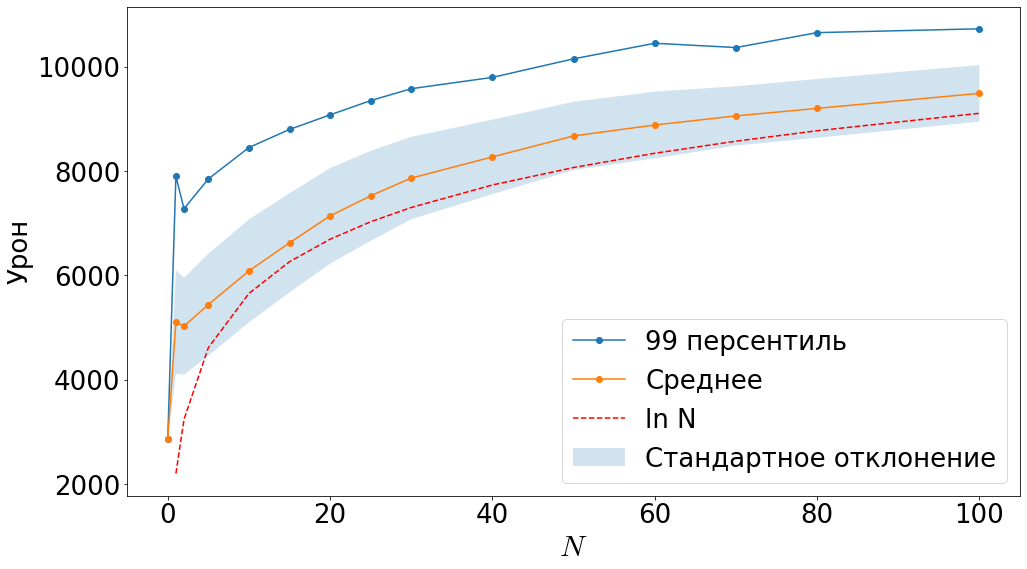

In [96]:
plt.figure(figsize=(16, 9))
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 26})

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))

y = np.array([np.percentile(metric_dict[N], 99) for N in x])
ax.plot(x, y, 'o-', label='99 персентиль')


x = sorted([N for N in metric_dict])
y = np.array([np.mean(metric_dict[N]) for N in x])
bar = np.array([np.std(metric_dict[N]) for N in x])

ax.plot(x, y, 'o-', label='Среднее')
ax.fill_between(x, y - bar, y + bar, alpha=0.2, label = 'Стандартное отклонение')

ax.plot(x, 1500 * np.log(np.array(x)) + 2200, '--', c='r', label='ln N')

ax.set_xlabel("$N$", rotation=0, fontsize=30)
plt.ylabel('Урон')
plt.legend()
plt.savefig('metric.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


<Figure size 1152x648 with 0 Axes>

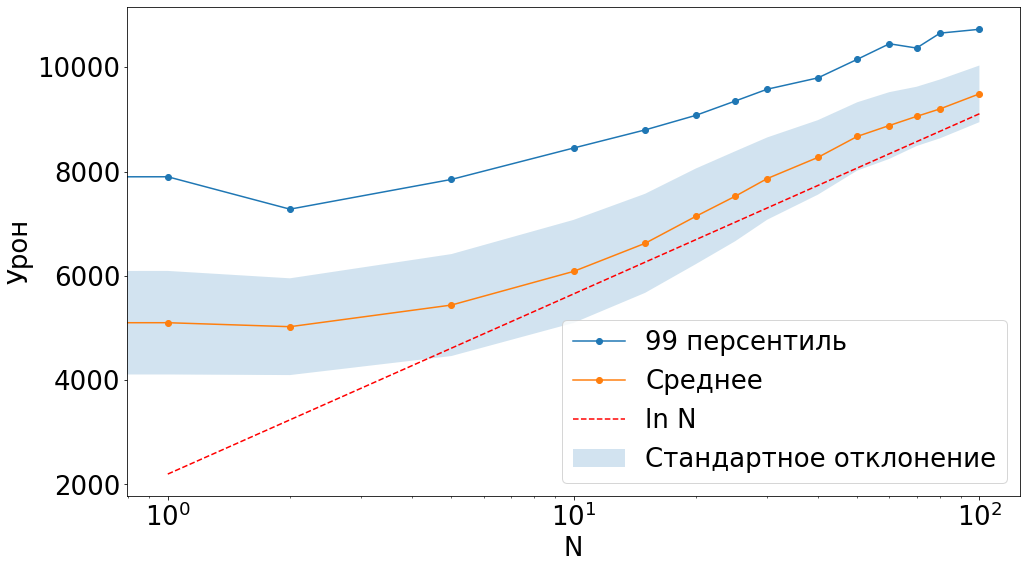

In [97]:
plt.figure(figsize=(16, 9))
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 26})

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))

y = np.array([np.percentile(metric_dict[N], 99) for N in x])
ax.plot(x, y, 'o-', label='99 персентиль')


x = sorted([N for N in metric_dict])
y = np.array([np.mean(metric_dict[N]) for N in x])
bar = np.array([np.std(metric_dict[N]) for N in x])

ax.plot(x, y, 'o-', label='Среднее')
ax.fill_between(x, y - bar, y + bar, alpha=0.2, label = 'Стандартное отклонение')

ax.plot(x, 1500 * np.log(np.array(x)) + 2200, '--', c='r', label='ln N')

plt.xlabel('N')
plt.ylabel('Урон')

plt.xscale('log')
plt.legend()
plt.savefig('metric_log.png')

<Figure size 1152x648 with 0 Axes>

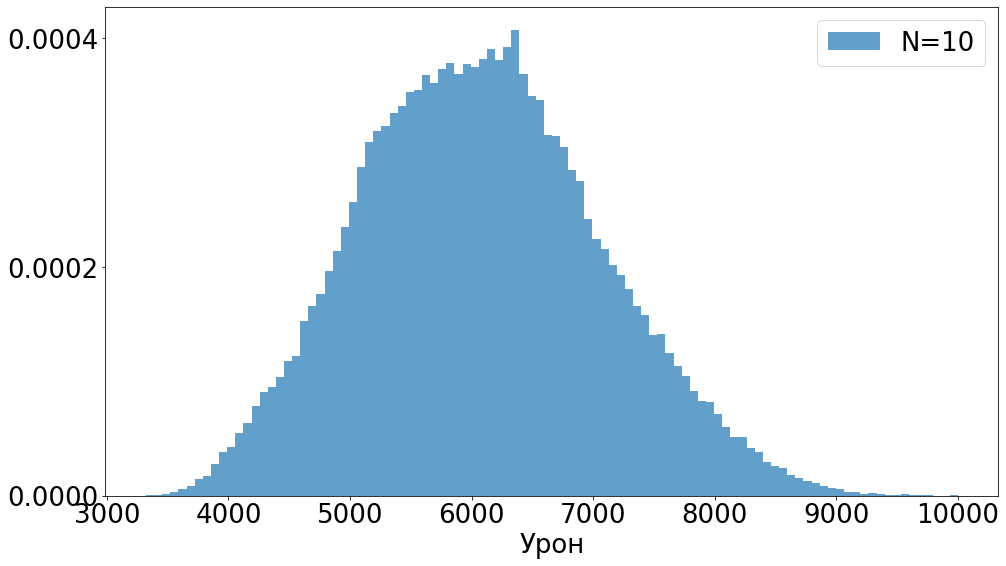

In [85]:
plt.figure(figsize=(16, 9))
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 26})

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0002))

for N in metric_dict:
    if N == 10:
        ax.hist(metric_dict[N], label='N={}'.format(N), alpha=0.7, density=True, bins=100)

plt.legend()
plt.xlabel('Урон')
plt.savefig('hist_1.png')

<Figure size 1152x648 with 0 Axes>

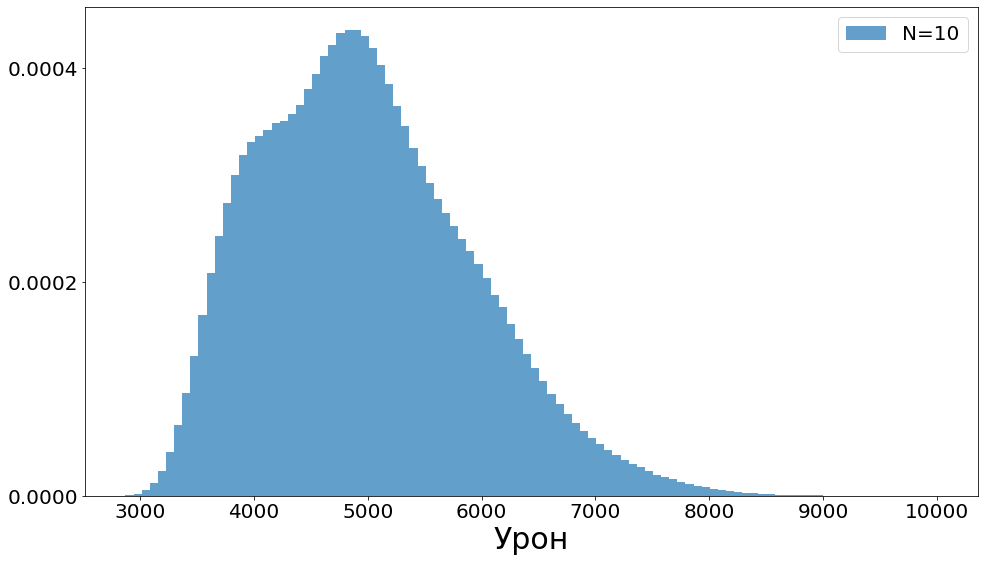

In [86]:
plt.figure(figsize=(16, 9))
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0002))

for N in metric_full_dict:
    if N == 10:
        ax.hist(metric_full_dict[N], label='N={}'.format(N), alpha=0.7, density=True, bins=100)


ax.set_xlabel("Урон", rotation=0, fontsize=30)
plt.legend()
plt.savefig('hist_2.png')

<Figure size 1152x648 with 0 Axes>

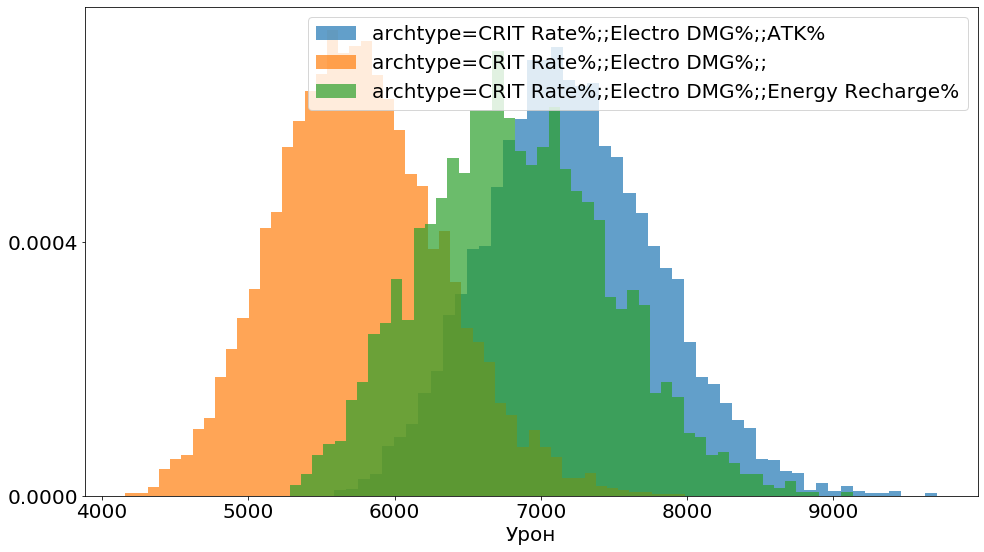

In [87]:
plt.figure(figsize=(16, 9))
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0004))

for name in metric_type:
    if 'Rate' in name and 'Electro' in name:
        ax.hist(metric_type[name], label='archtype={}'.format(name), alpha=0.7, density=True, bins=50)


#ax.set_ylabel("$BС$", rotation=0, fontsize=30)
ax.set_xlabel("Урон", rotation=0, fontsize=20)
plt.legend()
plt.savefig('hist_archetypes.png')

In [88]:
with open('metric_dict.json', 'w') as f:
    json.dump(metric_dict, f)

In [28]:
with open('metric_dict.json', 'r') as f:
    metric_dict = json.load(f)
    metric_dict = {int(k): v for k, v in metric_dict.items()}